# Student Performance ML

Here, we use a dataset to predict high school students grades based on various aspects of their lifes.

This [kaggle dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) has the following information:

"This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis."

## Device verification

In [78]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [79]:
import torch
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

device

'cpu'

## Reading in the data

In [80]:
import pandas as pd
df = pd.read_csv("/content/aux_data/performance_data.csv")

df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [81]:
# StudentID here is not relevant... so we're going to drop this column

df = df.dropna()
df = df.drop(columns = ["StudentID"])

df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [82]:
# Also, our prediction will be on the GradeClass, which makes the GPA column not relevant in this case:

df = df.drop(columns = ["GPA"])

df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.0


## Let's visualize how each data correlates with the GradeClass

#### Important note about the GradeClass values:
0: (GPA >= 3.5) \
1: (3.0 <= GPA < 3.5) \
2: (2.5 <= GPA < 3.0) \
3: (2.0 <= GPA < 2.5) \
4: (GPA < 2.0)

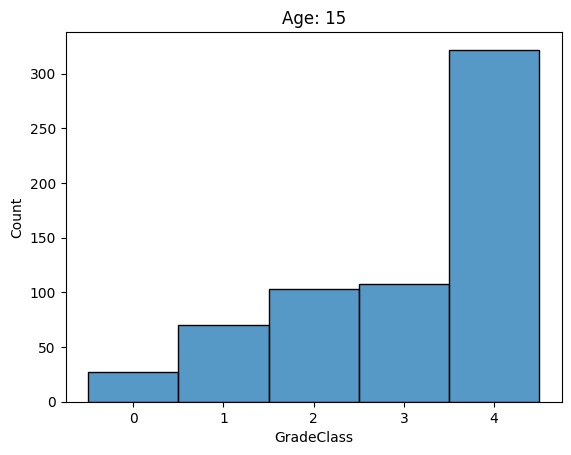

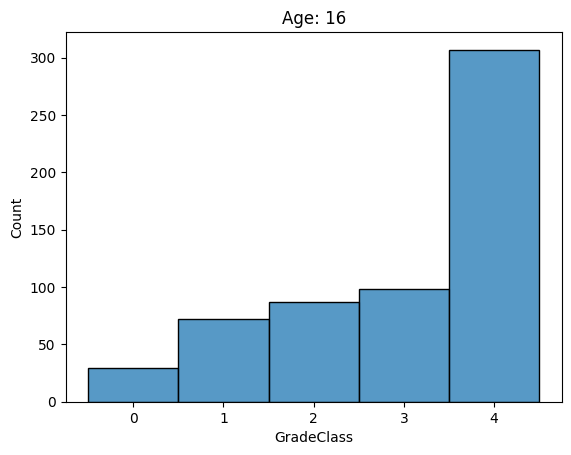

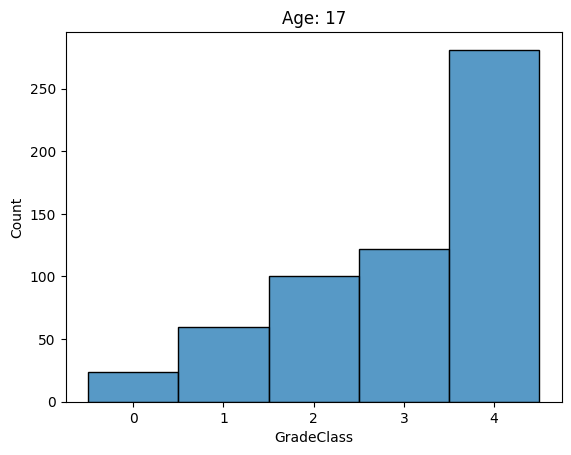

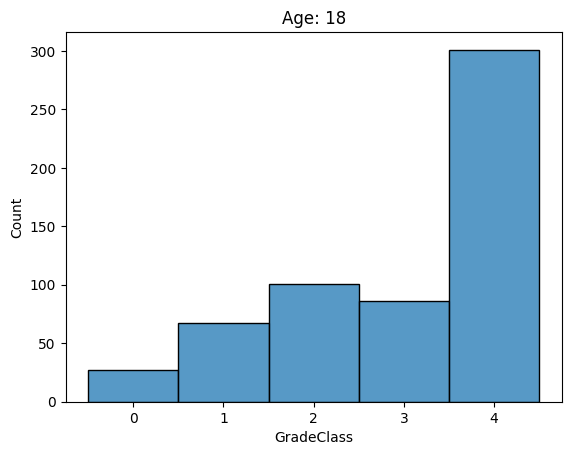

In [83]:
# age

import matplotlib.pyplot as plt
import seaborn as sns


list_ages = list(df["Age"].unique())
list_ages.sort()

for age in list_ages:
  df_age = df[df["Age"] == age]
  sns.histplot(data = df_age, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  plt.title(f"Age: {age}")
  plt.show()

Seems that the grades are well distributed in respect of the ages.

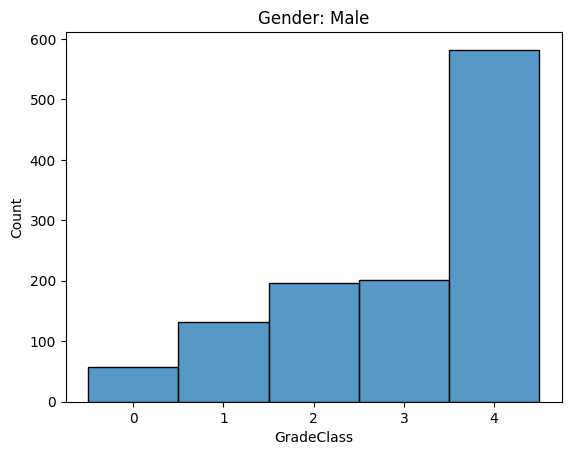

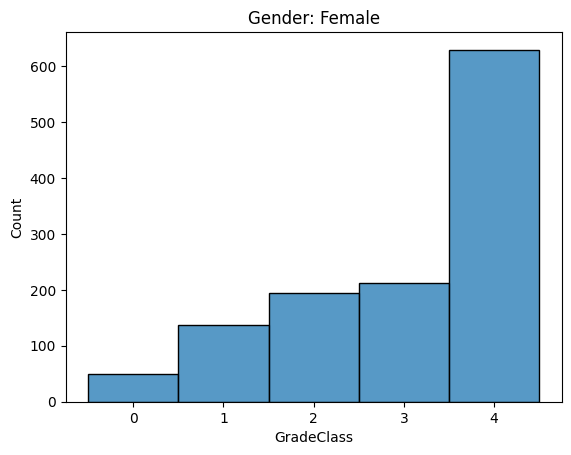

In [84]:
# gender

list_gender = list(df["Gender"].unique())
list_gender.sort()

for gender in list_gender:
  df_gender = df[df["Gender"] == gender]
  sns.histplot(data = df_gender, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  if gender == 0:
    plt.title(f"Gender: Male")
  else:
    plt.title(f"Gender: Female")
  plt.show()

Well distributed in relation to the gender as well.

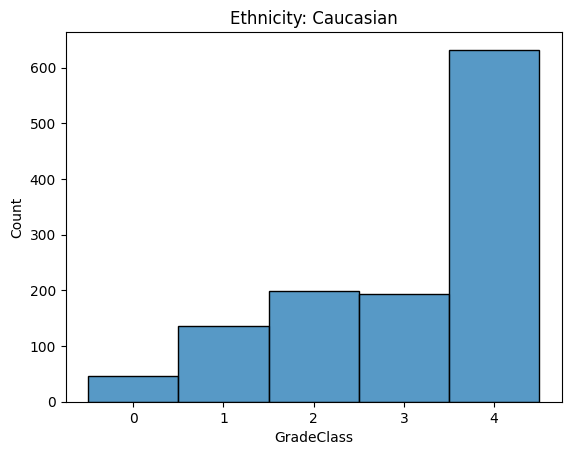

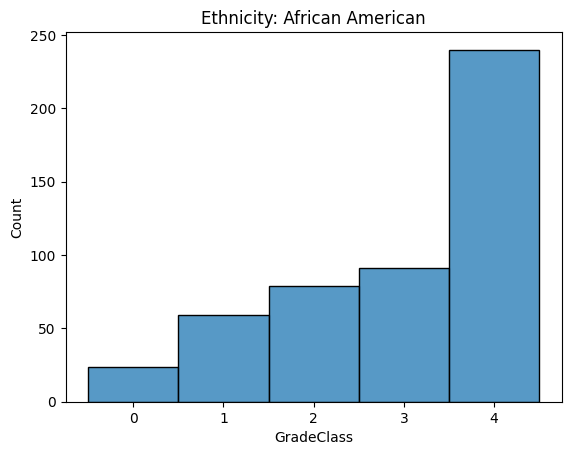

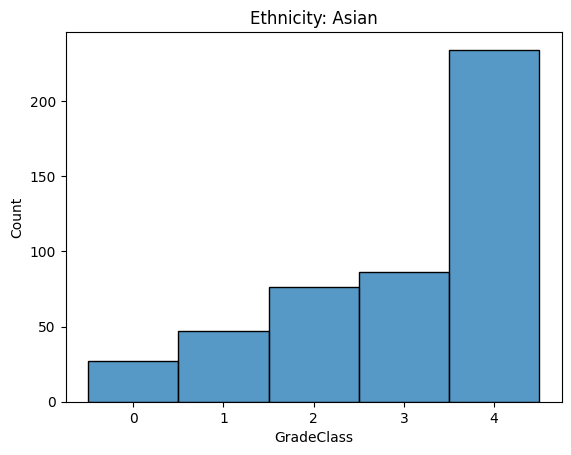

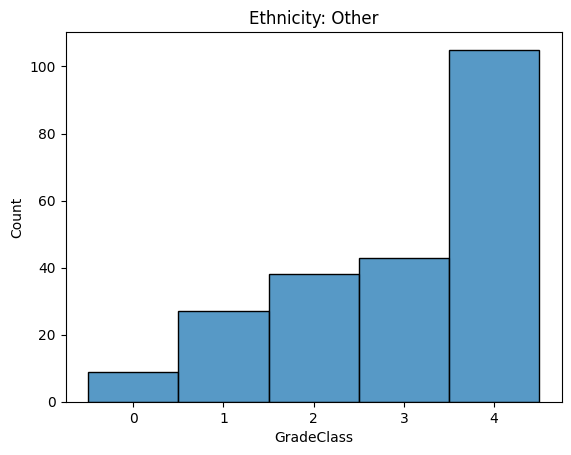

In [85]:
# ethnicity

list_ethnicity = list(df["Ethnicity"].unique())
list_ethnicity.sort()
list_names_of_ethnicities = ["Caucasian", "African American", "Asian", "Other"]
dictionary_of_ethnicities = dict(zip(list_ethnicity, list_names_of_ethnicities))

for ethnicity in list_ethnicity:
  df_ethnicity = df[df["Ethnicity"] == ethnicity]
  sns.histplot(data = df_ethnicity, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  plt.title(f"Ethnicity: {dictionary_of_ethnicities[ethnicity]}")
  plt.show()

It's well distributed, but the amount of data related to caucasians is clearly bigger than the others ethnicities.

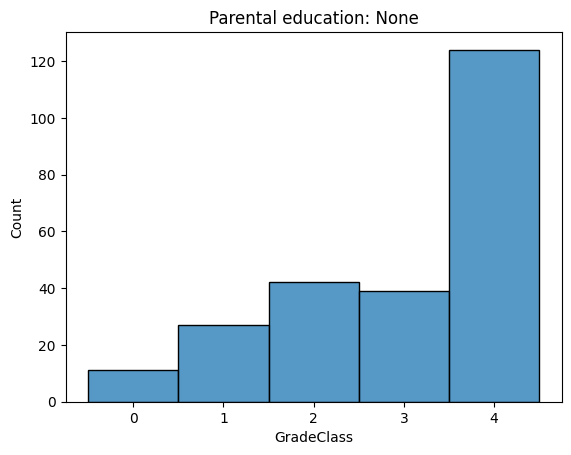

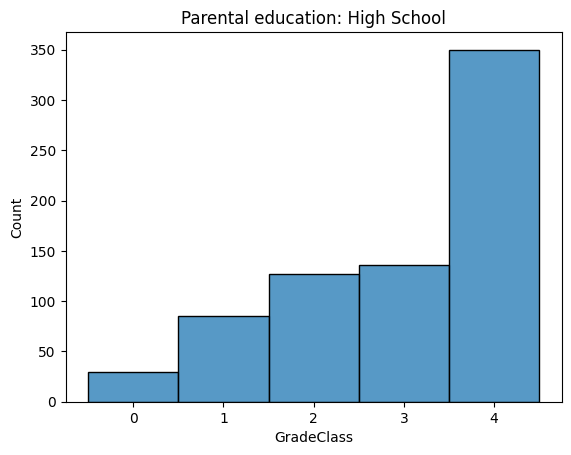

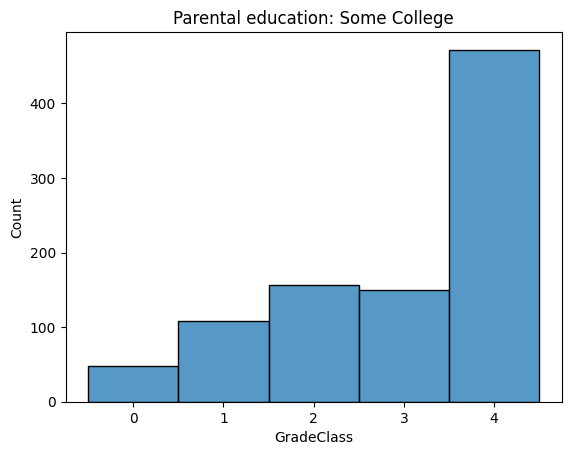

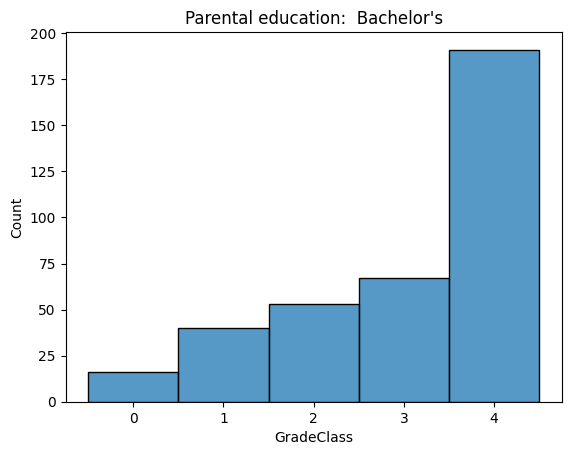

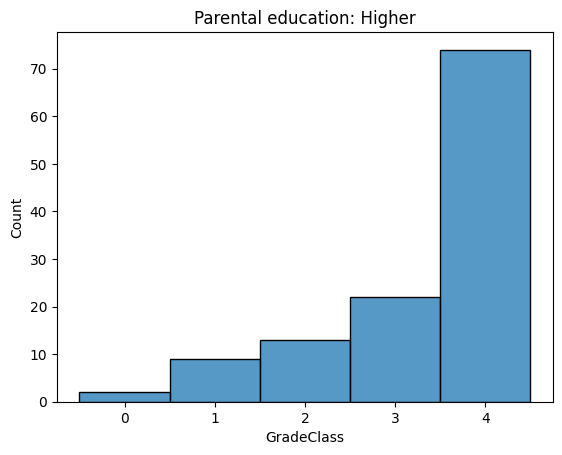

In [86]:
# parental education

list_parental_education = list(df["ParentalEducation"].unique())
list_parental_education.sort()
list_names_of_parental_educations = ["None", "High School", "Some College", " Bachelor's", "Higher"]
dictionary_of_parental_educations = dict(zip(list_parental_education, list_names_of_parental_educations))

for parental_education in list_parental_education:
  df_parental_education = df[df["ParentalEducation"] == parental_education]
  sns.histplot(data = df_parental_education, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  plt.title(f"Parental education: {dictionary_of_parental_educations[parental_education]}")
  plt.show()

Here we can see a different amount of data for each class of parental education, and a well distributed data over the different classes of parental education.

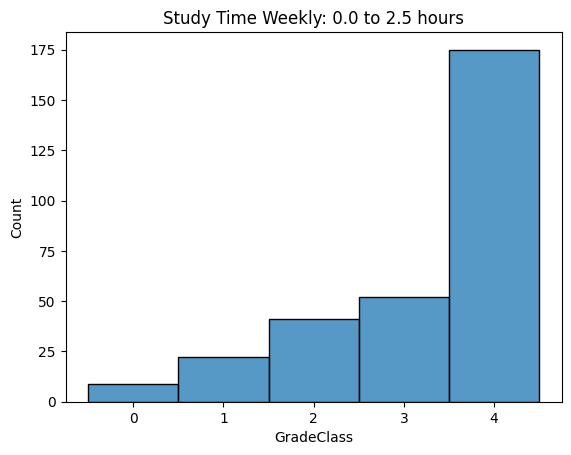

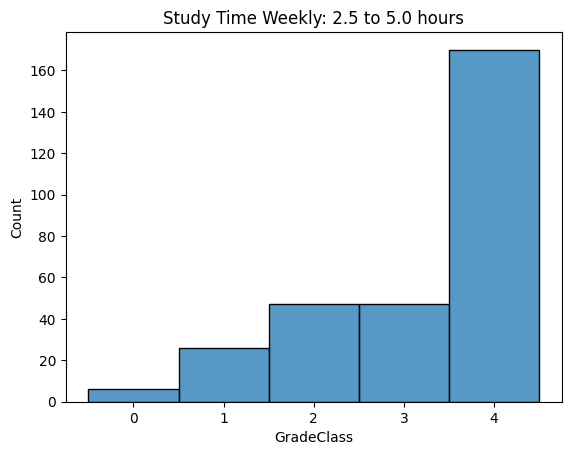

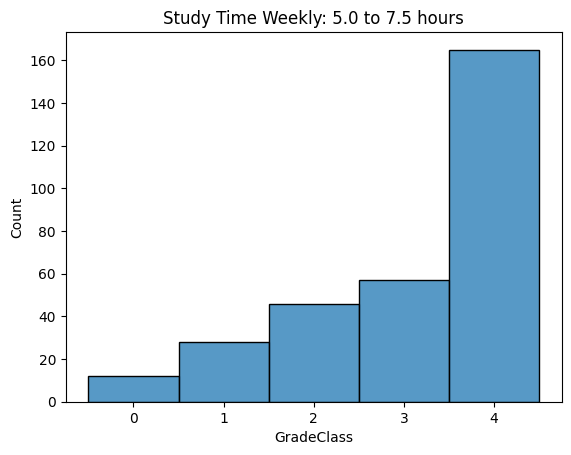

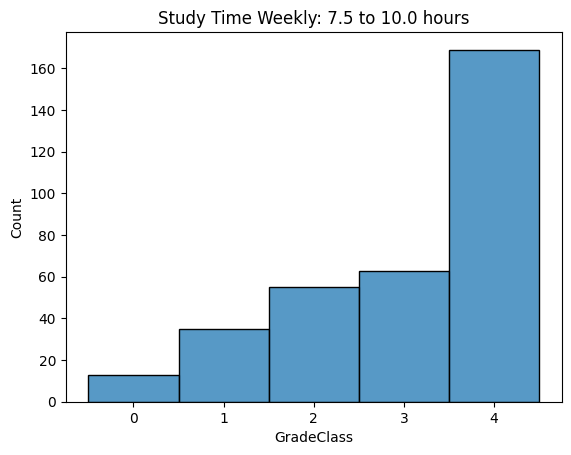

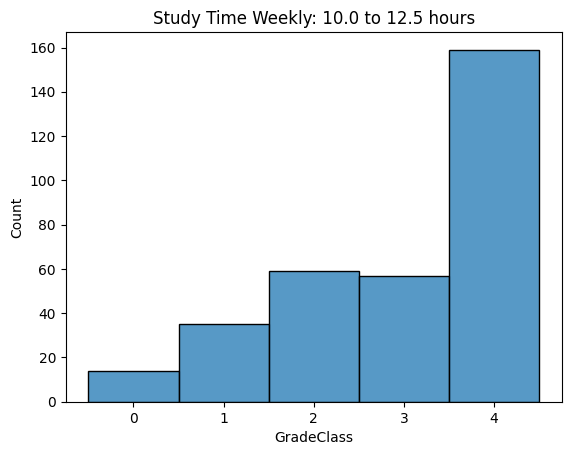

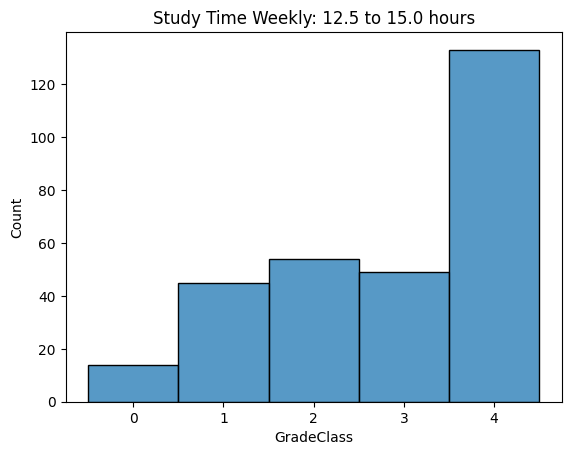

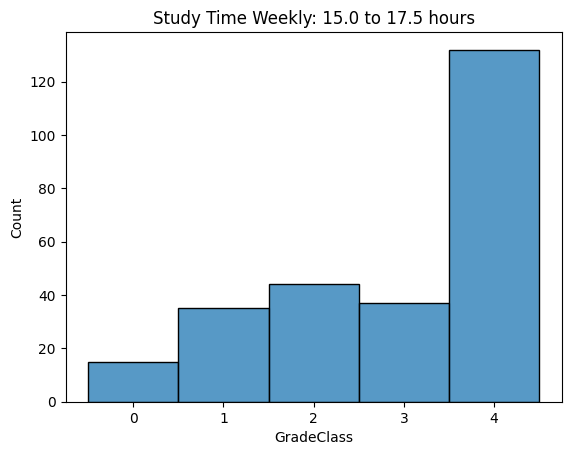

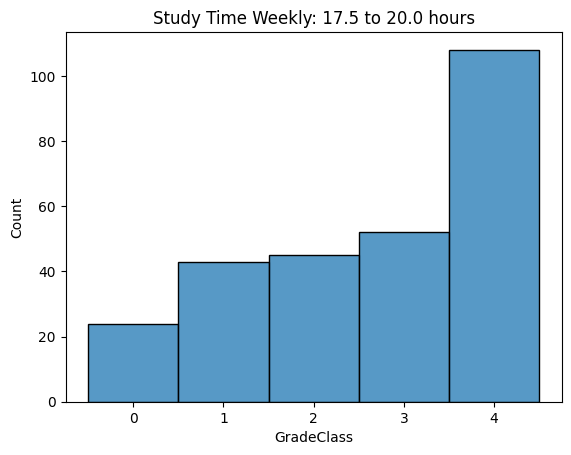

In [87]:
# study time weekly

# we are going to divide the data into classes (2.5 hours of size in each class):
lower_bound = 0.0
upper_bound = 2.5

for i in range(8):
  df_study_time = df[(lower_bound <= df["StudyTimeWeekly"]) & (df["StudyTimeWeekly"] <= upper_bound)]
  sns.histplot(data = df_study_time, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  plt.title(f"Study Time Weekly: {lower_bound} to {upper_bound} hours")
  plt.show()

  lower_bound += 2.5
  upper_bound += 2.5

Again, a well defined distribution over the study time weekly classes...

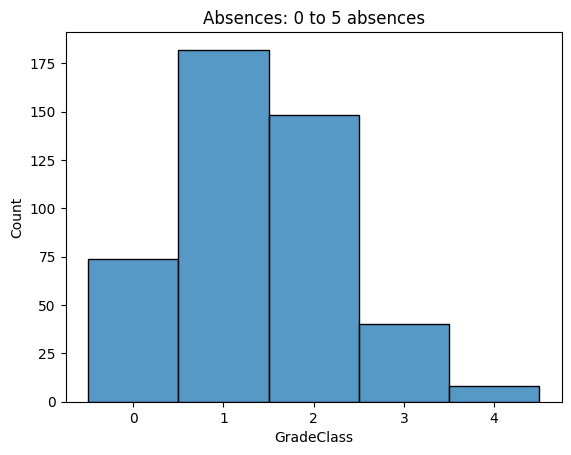

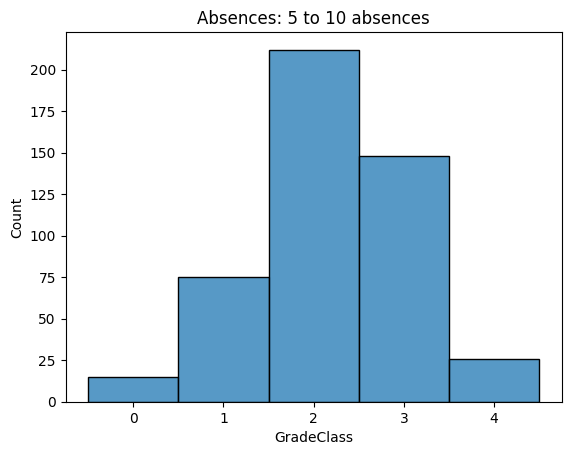

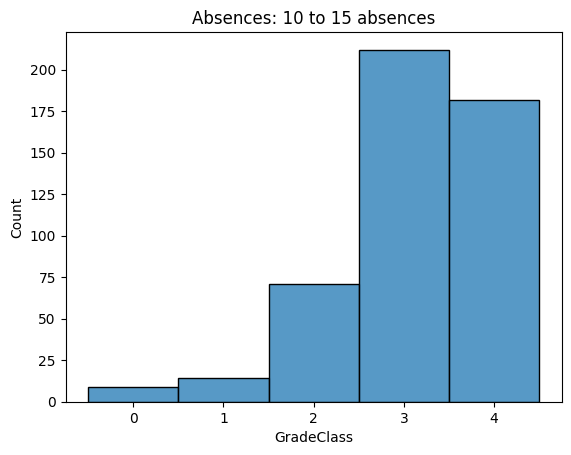

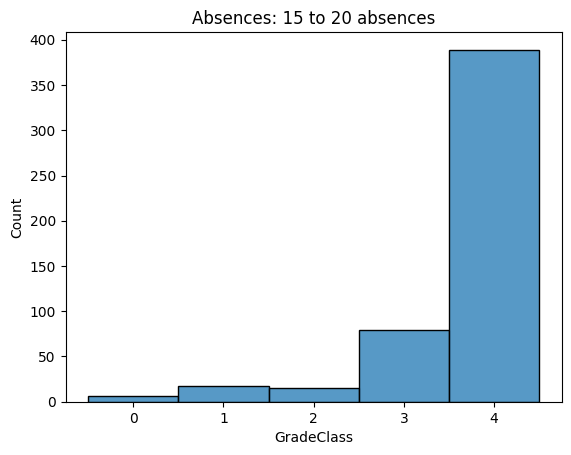

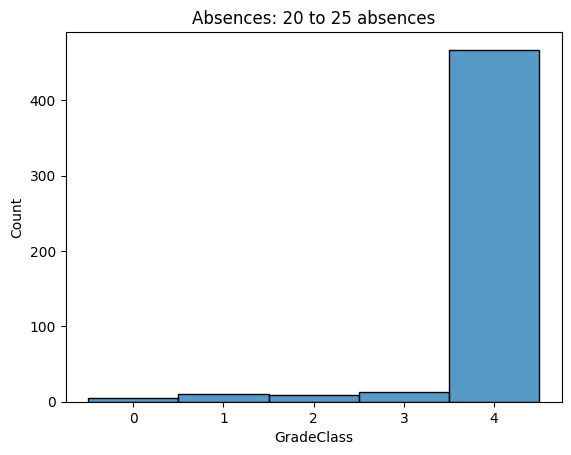

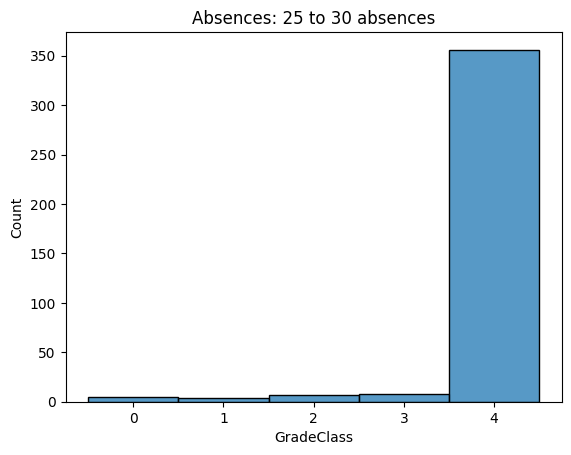

In [88]:
# absences

# again, dividing the data into classes (5 absences in each class)
lower_bound = 0
upper_bound = 5

for i in range(6):
  df_absences = df[(lower_bound <= df["Absences"]) & (df["Absences"] <= upper_bound)]
  sns.histplot(data = df_absences, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  plt.title(f"Absences: {lower_bound} to {upper_bound} absences")
  plt.show()

  lower_bound += 5
  upper_bound += 5

Here it's clear that the bigger the number of absences, the lower is the GPA.


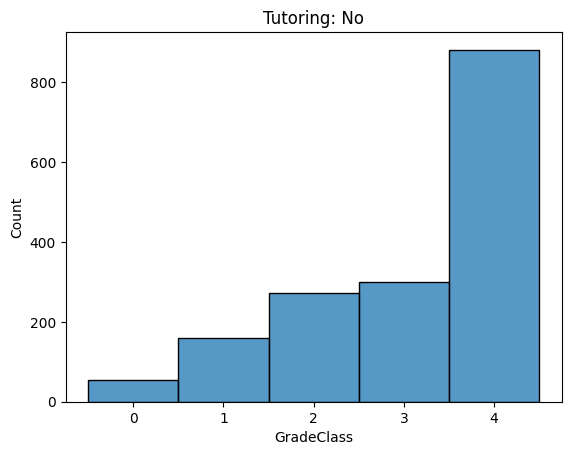

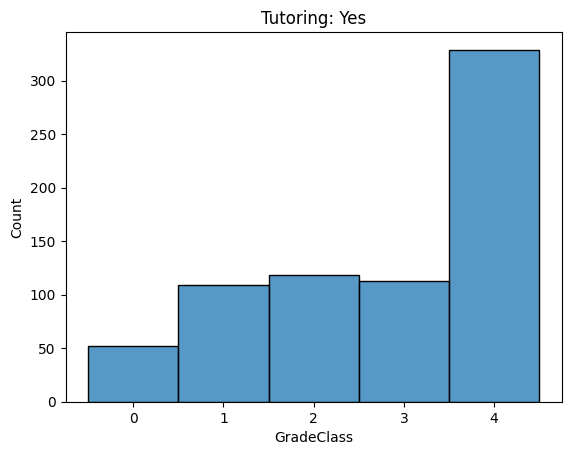

In [89]:
# tutoring

list_tutoring = list(df["Tutoring"].unique())
list_tutoring.sort()

for tutoring in list_tutoring:
  df_tutoring = df[df["Tutoring"] == tutoring]
  sns.histplot(data = df_tutoring, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  if tutoring == 0:
    plt.title(f"Tutoring: No")
  else:
    plt.title(f"Tutoring: Yes")
  plt.show()

Similar distributions, but it's important to note the different amount of data in each plot.

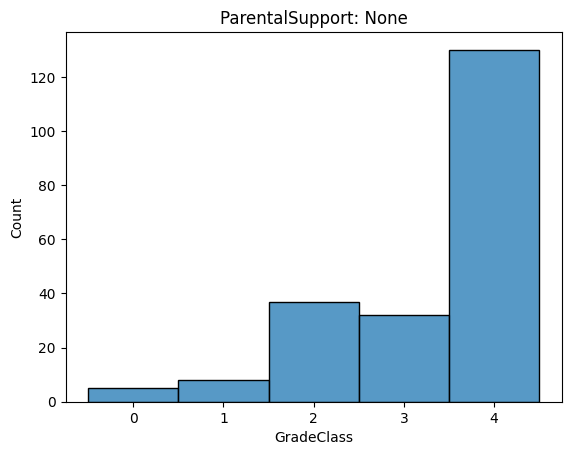

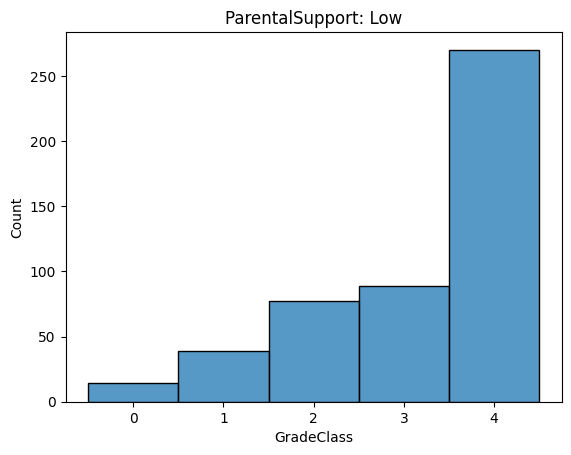

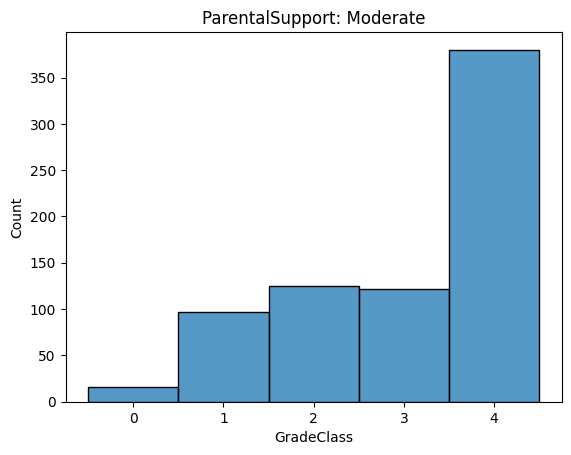

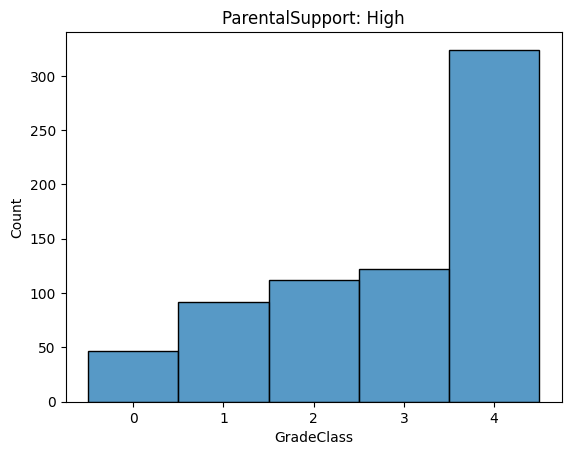

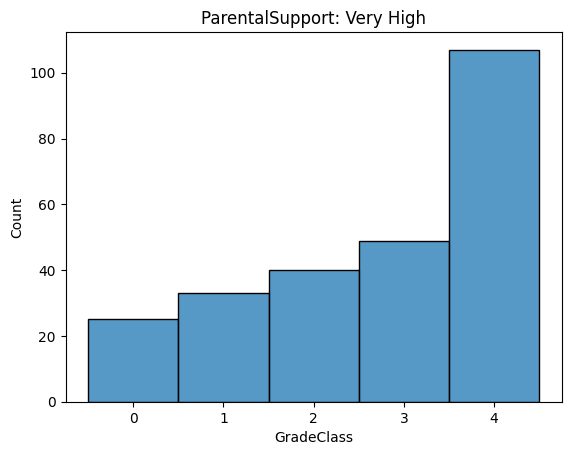

In [90]:
# parental support

list_parental_support = list(df["ParentalSupport"].unique())
list_parental_support.sort()
list_names_of_parental_supports = ["None", "Low", "Moderate", "High", "Very High"]
dictionary_of_parental_supports = dict(zip(list_parental_support, list_names_of_parental_supports))

for parental_support in list_parental_support:
  df_parental_support = df[df["ParentalSupport"] == parental_support]
  sns.histplot(data = df_parental_support, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  plt.title(f"ParentalSupport: {dictionary_of_parental_supports[parental_support]}")
  plt.show()

It's important to note that the distribution shifts towards the left (bigger GPA) as the parental support increases.

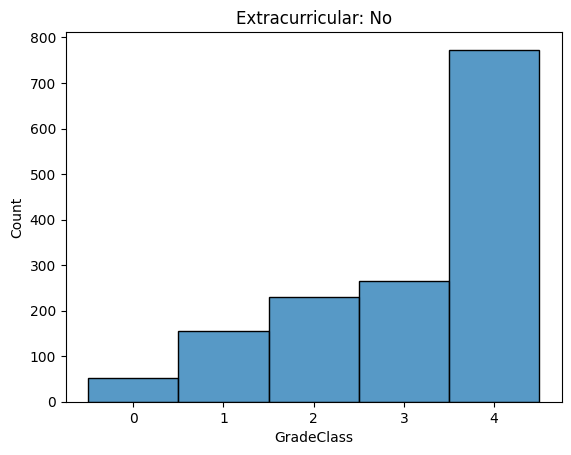

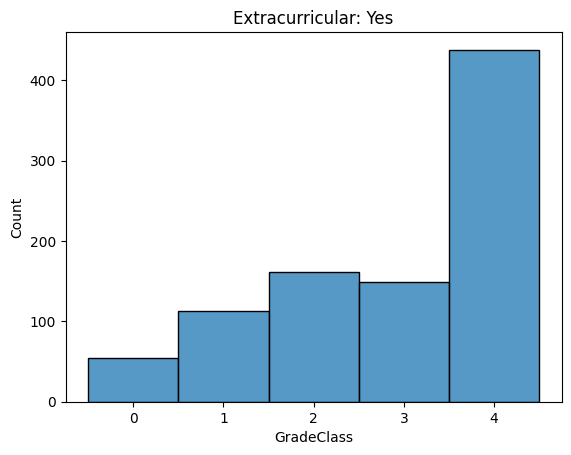

In [91]:
# extracurricular activities

list_extracurricular = list(df["Extracurricular"].unique())
list_extracurricular.sort()

for extracurricular in list_extracurricular:
  df_extracurricular = df[df["Extracurricular"] == extracurricular]
  sns.histplot(data = df_extracurricular, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  if extracurricular == 0:
    plt.title(f"Extracurricular: No")
  else:
    plt.title(f"Extracurricular: Yes")
  plt.show()

Quite similar distributions. Important to note the difference in the amount of data in each plot.

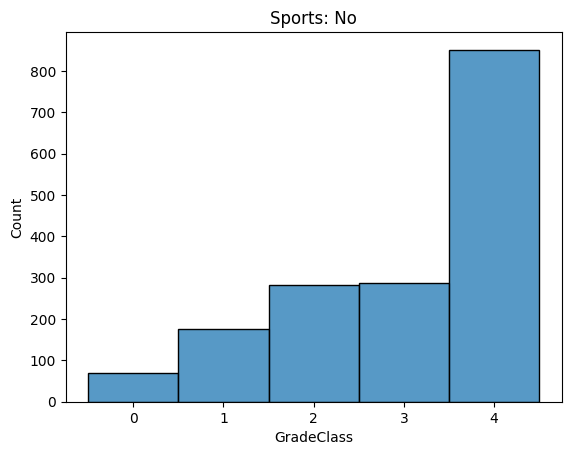

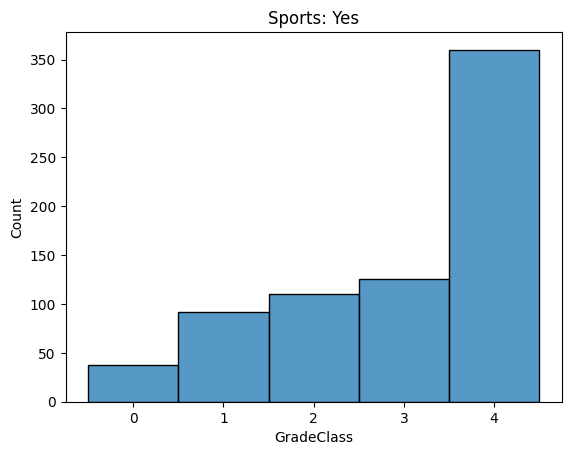

In [92]:
# sports

list_sports = list(df["Sports"].unique())
list_sports.sort()

for sports in list_sports:
  df_sports = df[df["Sports"] == sports]
  sns.histplot(data = df_sports, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  if sports == 0:
    plt.title(f"Sports: No")
  else:
    plt.title(f"Sports: Yes")
  plt.show()

Again, quite similar distributions. Important to note the difference in the amount of data in each plot.

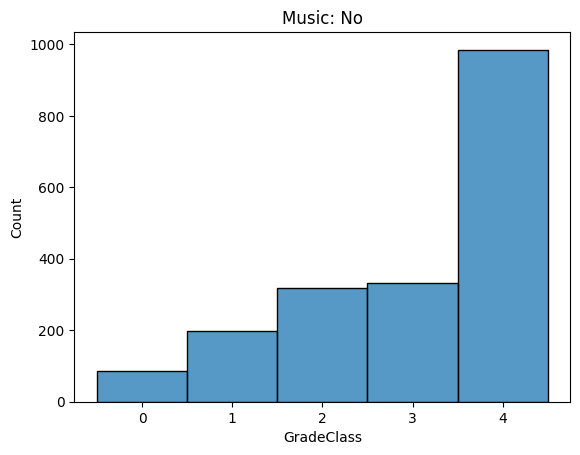

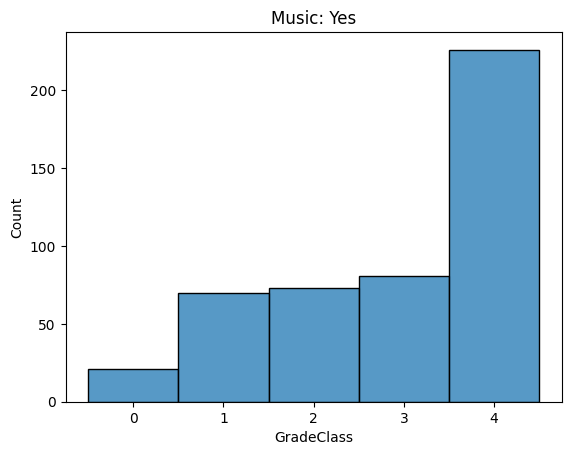

In [93]:
# music

list_music = list(df["Music"].unique())
list_music.sort()

for music in list_music:
  df_music = df[df["Music"] == music]
  sns.histplot(data = df_music, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  if music == 0:
    plt.title(f"Music: No")
  else:
    plt.title(f"Music: Yes")
  plt.show()

Again, quite similar distributions. Important to note the difference in the amount of data in each plot.

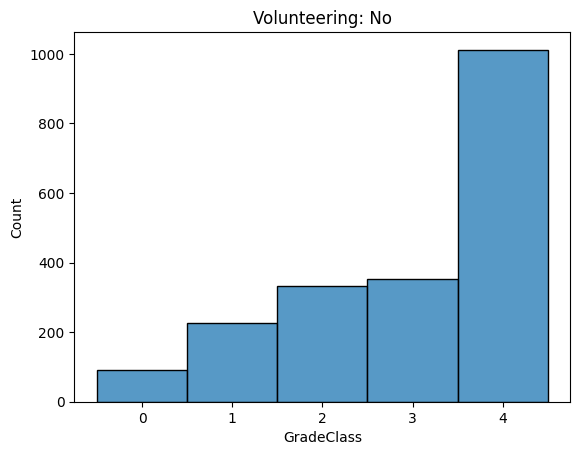

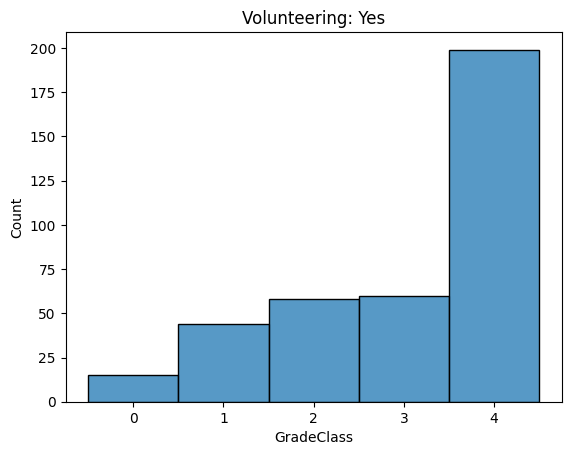

In [94]:
# volunteering

list_volunteering = list(df["Volunteering"].unique())
list_volunteering.sort()

for volunteering in list_volunteering:
  df_volunteering = df[df["Volunteering"] == volunteering]
  sns.histplot(data = df_volunteering, x = "GradeClass", discrete = True)
  plt.xticks([0, 1, 2, 3, 4])
  if volunteering == 0:
    plt.title(f"Volunteering: No")
  else:
    plt.title(f"Volunteering: Yes")
  plt.show()

Again, quite similar distributions. Important to note the difference in the amount of data in each plot.

### Important to note here is that the dataset is extremely sensitive on the absences, being the most influential feature in the inference phase.

## Definition of sets of training and testing, as well as model, loss and optimizer definitions.

In [95]:
# train test split

from sklearn.model_selection import train_test_split

df_labels = df.drop(columns = ["GradeClass"])

x, y = df_labels.values, df["GradeClass"].values
x, y = torch.from_numpy(x).type(torch.float), torch.from_numpy(y).type(torch.LongTensor)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([1913, 12]),
 torch.Size([479, 12]),
 torch.Size([1913]),
 torch.Size([479]))

In [96]:
# model definition
from torch import nn
torch.manual_seed(42)

class PerformanceFitting(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_one = nn.Linear(in_features = 12, out_features = 48)
    self.layer_two = nn.Linear(in_features = 48, out_features = 144)
    self.layer_three = nn.Linear(in_features = 144, out_features = 72)
    self.layer_four = nn.Linear(in_features = 72, out_features = 36)
    self.layer_five = nn.Linear(in_features = 36, out_features = 18)
    self.layer_six = nn.Linear(in_features = 18, out_features = 5)
    self.batch_normalization_one = nn.BatchNorm1d(48)
    self.batch_normalization_two = nn.BatchNorm1d(144)
    self.batch_normalization_three = nn.BatchNorm1d(72)
    self.batch_normalization_four = nn.BatchNorm1d(36)
    self.batch_normalization_five = nn.BatchNorm1d(18)
    self.layer_elu = nn.ELU()

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    x = self.layer_elu(self.batch_normalization_one(self.layer_one(x)))
    x = self.layer_elu(self.batch_normalization_two(self.layer_two(x)))
    x = self.layer_elu(self.batch_normalization_three(self.layer_three(x)))
    x = self.layer_elu(self.batch_normalization_four(self.layer_four(x)))
    x = self.layer_elu(self.batch_normalization_five(self.layer_five(x)))
    x = self.layer_six(x)
    return x

model = PerformanceFitting()
model

PerformanceFitting(
  (layer_one): Linear(in_features=12, out_features=48, bias=True)
  (layer_two): Linear(in_features=48, out_features=144, bias=True)
  (layer_three): Linear(in_features=144, out_features=72, bias=True)
  (layer_four): Linear(in_features=72, out_features=36, bias=True)
  (layer_five): Linear(in_features=36, out_features=18, bias=True)
  (layer_six): Linear(in_features=18, out_features=5, bias=True)
  (batch_normalization_one): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_normalization_two): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_normalization_three): BatchNorm1d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_normalization_four): BatchNorm1d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_normalization_five): BatchNorm1d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer_elu): ELU(alpha=1.0)

In [97]:
# defining loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01, weight_decay=0.00001, momentum=0.1)

## Making the training and testing loop

In [98]:
!pip install torchmetrics

In [99]:
# defining the accuracy metric
from torchmetrics.classification import Accuracy

accuracy = Accuracy(task = "multiclass", num_classes = 5).to(device)

In [100]:
# training and testing loop
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, "min", patience = 10, factor = 0.5)

def train_test_loop(model, x_train, x_test, y_train, y_test):
  x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)
  model = model.to(device)

  train_loss_values = []
  test_loss_values = []
  epoch_count = []

  epochs = 1000

  for epoch in range(epochs):
    # train
    model.train()

    y_pred_train = model(x_train)

    loss_train = loss_function(y_pred_train, y_train)
    scheduler.step(loss_train)
    accuracy_train = accuracy(y_pred_train, y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    # test
    if (epoch % 10 == 0):
      model.eval()
      with torch.inference_mode():
        y_pred_test = model(x_test.to(device))

        loss_test = loss_function(y_pred_test, y_test)
        scheduler.step(loss_test)
        accuracy_test = accuracy(y_pred_test, y_test)

        epoch_count.append(epoch)
        train_loss_values.append(loss_train.cpu().detach().numpy())
        test_loss_values.append(loss_test.cpu().detach().numpy())
        print(f"Epoch: {epoch} | Train Loss: {loss_train:.5f} | Train accuracy: {accuracy_train:.5f} | Test Loss: {loss_test:.5f} | Test Accuracy: {accuracy_test:.5f}")


  # loss curves
  plt.plot(epoch_count, train_loss_values, label="Train loss values")
  plt.plot(epoch_count, test_loss_values, label="Test loss values")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()


Epoch: 0 | Train Loss: 1.72196 | Train accuracy: 0.22269 | Test Loss: 1.64960 | Test Accuracy: 0.17954
Epoch: 10 | Train Loss: 1.16164 | Train accuracy: 0.60115 | Test Loss: 1.45117 | Test Accuracy: 0.51775
Epoch: 20 | Train Loss: 1.05645 | Train accuracy: 0.66179 | Test Loss: 1.24894 | Test Accuracy: 0.60125
Epoch: 30 | Train Loss: 0.99386 | Train accuracy: 0.69577 | Test Loss: 1.09642 | Test Accuracy: 0.65136
Epoch: 40 | Train Loss: 0.95155 | Train accuracy: 0.70413 | Test Loss: 1.00345 | Test Accuracy: 0.65762
Epoch: 50 | Train Loss: 0.91924 | Train accuracy: 0.71458 | Test Loss: 0.95221 | Test Accuracy: 0.67015
Epoch: 60 | Train Loss: 0.89279 | Train accuracy: 0.72347 | Test Loss: 0.92177 | Test Accuracy: 0.68476
Epoch: 70 | Train Loss: 0.87085 | Train accuracy: 0.73393 | Test Loss: 0.90087 | Test Accuracy: 0.69311
Epoch: 80 | Train Loss: 0.85276 | Train accuracy: 0.73706 | Test Loss: 0.88455 | Test Accuracy: 0.70355
Epoch: 90 | Train Loss: 0.83734 | Train accuracy: 0.74229 | Test 

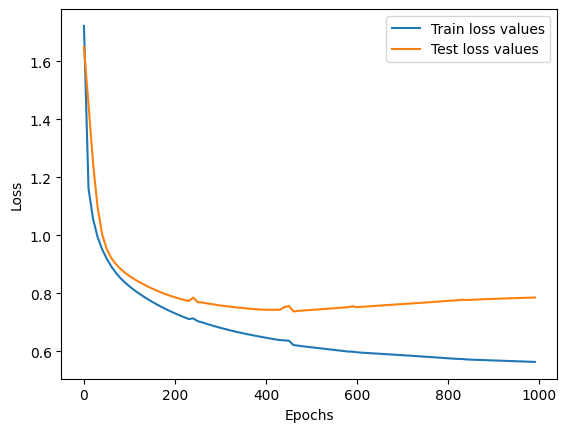

In [101]:
train_test_loop(model, x_train, x_test, y_train, y_test)

## Make predictions!

In [102]:
def prediction(age, gender, ethnicity, parental_education, study_time_weekly, absences, tutoring, parental_support, extracurricular, sports, music, volunteering):
  model.eval()
  tensor_input = torch.tensor([age, gender, ethnicity, parental_education, study_time_weekly, absences, tutoring, parental_support, extracurricular, sports, music, volunteering]).type(torch.float)
  tensor_input = tensor_input.unsqueeze(0)
  result_logit = model(tensor_input.to(device))
  result = torch.softmax(result_logit, dim = 1).argmax(dim = 1)
  if (result == 0):
    return "Grade A"
  elif (result == 1):
    return "Grade B"
  elif (result == 2):
    return "Grade C"
  elif (result == 3):
    return "Grade D"
  else:
    return "Grade F"